In [1]:
%matplotlib inline 

from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## Fetching the Wikipedia site

In [2]:
url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_by_country_and_territory'
html = requests.get(url)
html_source = html.text
#print(html_source)


## Parsing html data

In [3]:
bs_object = BeautifulSoup(html_source, "html.parser")
table = bs_object.find("table", id="thetable")
#print(table)


## Extracting data and filling it into a dictionary

In [7]:
# extract headings and actual data and combine data into single dict
table_body = table.find("tbody")
con_infos = table_body.find_all("tr")

con_list = list()
for con_info in con_infos:
    record = list()
    name_temp = con_info.find("a")
    name = name_temp.get_text()
    record.append(name)
    numbers_temp = con_info.find_all("td")
    for i in range(len(numbers_temp)-1):
        number = numbers_temp[i].get_text()
        record.append(number)
    con_list.append(record)

#print(len(con_list))
remove_list = list()
for con in con_list:
    if len(con) != 4:
        remove_list.append(con)

#print(remove_list)
for r in remove_list:
    con_list.remove(r)

#print(len(con_list))
#print(con_list)

dictionary = dict()

for con in con_list:
    for i in range(1, len(con)):
        con[i] = con[i].replace('\n', '')
    con_dict = dict()
    con_dict['cases'] = con[1]
    con_dict['deaths'] = con[2]
    con_dict['recovers'] = con[3]
    dictionary[con[0]] = con_dict

print(dictionary)
    





{'United States': {'cases': '1,497,244', 'deaths': '89,420', 'recovers': '272,525'}, 'Russia': {'cases': '281,752', 'deaths': '2,631', 'recovers': '67,373'}, 'United Kingdom': {'cases': '240,161', 'deaths': '34,466', 'recovers': 'No data'}, 'Brazil': {'cases': '233,511', 'deaths': '15,662', 'recovers': '89,672'}, 'Spain': {'cases': '231,350', 'deaths': '27,650', 'recovers': '149,576'}, 'Italy': {'cases': '224,760', 'deaths': '31,763', 'recovers': '122,810'}, 'Germany': {'cases': '176,244', 'deaths': '8,027', 'recovers': '152,600'}, 'Turkey': {'cases': '148,067', 'deaths': '4,096', 'recovers': '108,137'}, 'France': {'cases': '142,291', 'deaths': '27,625', 'recovers': '61,066'}, 'Iran': {'cases': '118,392', 'deaths': '6,937', 'recovers': '93,147'}, 'India': {'cases': '90,927', 'deaths': '2,872', 'recovers': '34,109'}, 'Peru': {'cases': '88,541', 'deaths': '2,523', 'recovers': '28,272'}, 'China': {'cases': '82,947', 'deaths': '4,634', 'recovers': '78,227'}, 'Canada': {'cases': '75,864', '

In [8]:
col_names = ['cases', 'deaths', 'recovers']
df = pd.DataFrame.from_dict(dictionary, orient='index', columns=col_names)
#print(df)
df = df.replace('No data', '0')
print(df)

                             cases  deaths recovers
United States            1,497,244  89,420  272,525
Russia                     281,752   2,631   67,373
United Kingdom             240,161  34,466        0
Brazil                     233,511  15,662   89,672
Spain                      231,350  27,650  149,576
...                            ...     ...      ...
Bonaire                          2       0        2
Saba                             2       0        2
Sint Eustatius                   2       0        2
Lesotho                          1       0        0
Saint Pierre & Miquelon          1       0        1

[228 rows x 3 columns]


## Adding column of death rates to the dataframe

In [9]:
df['cases'] = df.cases.str.replace(',', '').astype('int')
df['deaths'] = df.deaths.str.replace(',', '').astype('int')
df['recovers'] = df.recovers.str.replace(',', '').astype('int')

df['death_rates'] = round(df['deaths']/df['cases'], 2)

df = df.sort_values(by=['death_rates'])
print(df)

                          cases  deaths  recovers  death_rates
Saint Pierre & Miquelon       1       0         1         0.00
Guinea-Bissau               969       4        26         0.00
Faroe Islands               187       0       187         0.00
Saint Vincent                17       0        14         0.00
Uganda                      227       0        63         0.00
...                         ...     ...       ...          ...
Coral Princess               12       2         0         0.17
Sint Maarten                 77      15        54         0.19
France                   142291   27625     61066         0.19
MS Zaandam                   13       4         0         0.31
Nicaragua                    25       8         7         0.32

[228 rows x 4 columns]


In [10]:
# highest 5
print(df.tail(n=5))
# lowest 5
print(df.head(n=5))

                 cases  deaths  recovers  death_rates
Coral Princess      12       2         0         0.17
Sint Maarten        77      15        54         0.19
France          142291   27625     61066         0.19
MS Zaandam          13       4         0         0.31
Nicaragua           25       8         7         0.32
                         cases  deaths  recovers  death_rates
Saint Pierre & Miquelon      1       0         1          0.0
Guinea-Bissau              969       4        26          0.0
Faroe Islands              187       0       187          0.0
Saint Vincent               17       0        14          0.0
Uganda                     227       0        63          0.0


In [11]:
highest_df = df.tail(n=5)
print(highest_df)

                 cases  deaths  recovers  death_rates
Coral Princess      12       2         0         0.17
Sint Maarten        77      15        54         0.19
France          142291   27625     61066         0.19
MS Zaandam          13       4         0         0.31
Nicaragua           25       8         7         0.32


## Grouped bar chart

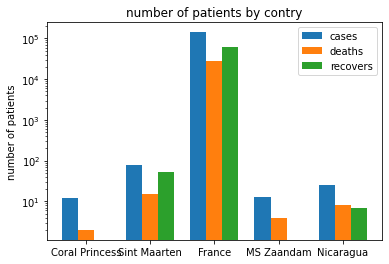

In [12]:
import numpy as np

labels = highest_df.index
cases = highest_df['cases']
deaths = highest_df['deaths']
recovers = highest_df['recovers']

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x -width, cases, width, label='cases')
rects2 = ax.bar(x, deaths, width, label='deaths')
rects3 = ax.bar(x + width, recovers, width, label='recovers')

ax.set_ylabel('number of patients')
ax.set_title('number of patients by contry')

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

plt.yscale('log')
plt.show()